In [1]:
import mxnet as mx 
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from symbol import get_generator, get_discriminator
import os
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Takes the images in our batch and arranges them in an array so that they can be
#Plotted using matplotlib
def fill_buf(buf, num_images, img, shape):
    width = buf.shape[0]/shape[1]
    height = buf.shape[1]/shape[0]
    img_width = (num_images%width)*shape[0]
    img_hight = (num_images/height)*shape[1]
    buf[img_hight:img_hight+shape[1], img_width:img_width+shape[0], :] = img
    
#Plots two images side by side using matplotlib
def visualize(fake):
    #64x3x64x64 to 64x64x64x3
    fake = fake.transpose((0, 2, 3, 1))
    #Pixel values from 0-255
    fake = np.clip((fake+1.0)*(255.0/2.0), 0, 255).astype(np.uint8)
    
    #Create buffer array that will hold all the images in our batch
    #Fill the buffer so to arrange all images in the batch onto the buffer array
    n = np.ceil(np.sqrt(fake.shape[0]))
    fbuff = np.zeros((int(n*fake.shape[1]), int(n*fake.shape[2]), int(fake.shape[3])), dtype=np.uint8)
    for i, img in enumerate(fake):
        fill_buf(fbuff, i, img, fake.shape[1:3])
        
    #Create a matplotlib figure with two subplots: one for the real and the other for the fake
    #fill each plot with our buffer array, which creates the image
    fig = plt.figure()
    plt.imshow(fbuff)
    plt.show()

In [3]:
# define random iter
class RandIter(mx.io.DataIter):
    def __init__(self, batch_size, ndim):
        self.batch_size = batch_size
        self.ndim = ndim
        self.provide_data = [('rand', (batch_size, ndim, 1, 1))]
        self.provide_label = []

    def iter_next(self):
        return True

    def getdata(self):
        #Returns random numbers from a gaussian (normal) distribution 
        #with mean=0 and standard deviation = 1
        return [mx.random.normal(0, 1.0, shape=(self.batch_size, self.ndim, 1, 1))]
rand = RandIter(128, 100)

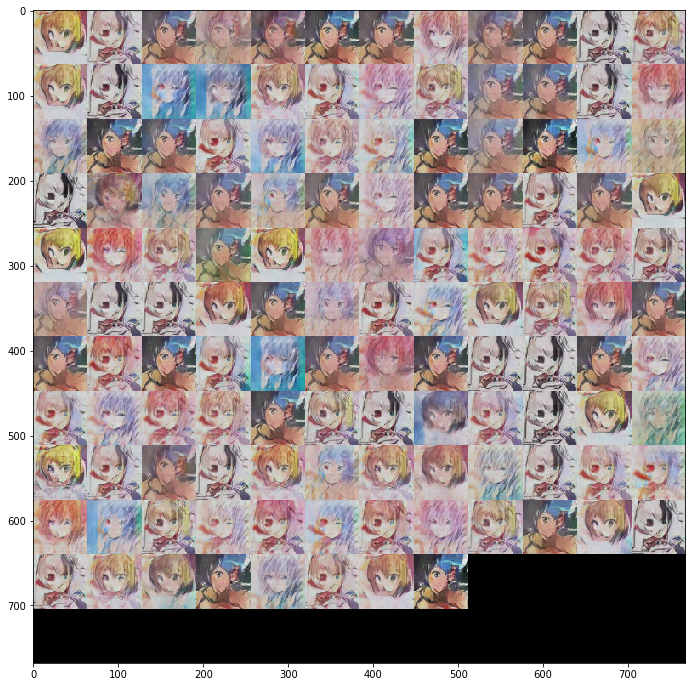

In [4]:
symG, argG, augG = mx.model.load_checkpoint(prefix="./save_img1510817146.24/Generator",
                            epoch=124)
mod = mx.mod.Module(context=mx.gpu(0), data_names=['rand'], symbol=symG, label_names=[])
mod.bind(rand.provide_data)
mod.set_params(argG, augG)
rdata = rand.next()
mod.forward(data_batch=rdata, is_train=False)
out = mod.get_outputs()[0].asnumpy()
visualize(out)